$$CONCEITO:$$

**Naive Bayes** = Mede a probabilidade do evento ocorrer ou não, assumindo que as variáveis preditoras são todas igualmente importantes e sem correlação entre si


**Hipótese de independência entre os atributos, leva em conta que cada variável preditora tem uma participação independente na variável target, sendo assim se as variáveis tiverem alta correlação entre si, o modelo pode ser enviesado**

**Dados podem ser paramétricos ou Nao paramétricos**


**Probabilidade Condicional**= A probabilidade do evento ocorrer, é calculada de forma individual para cada variavel preditora, e no final, soma-se todas as probabilidades das variáveis preditoras em relação cada classe da variável target



**Passos para criar o algoritimo Naive Bayes:**

- 1°: Converter o conjunto de dados em uma tabela de frequência

- 2°: Criar a tabela de probabilidade e encontrar a probabilidade de ocorrência de cada combinação de classes

- 3°: Usar a equação do Teorema de bayes para calcular a probabilidade de cada classe da variável target, a classe com maior probabilidade é o resultado da previsão





$$TIPOS DE VARIAVEIS:$$

**Variáveis Preditoras:** 

**Categórica:** (Criar Tabela de Contingencia),Desempenho é bom em caso de variáveis categóricas de entrada em comparação com variáveis numéricas. Para variáveis numéricas explicativas, assume-se a distribuição normal

**Continua:** Funçao de Densidade de Probabilidade no cálculo da Probabilidade condicional, Transforma a variavel em uma distribuição Normal, Função kernel de densidade para especificar um outro tipo de distribuição caso não seja Normal

**OBS: Os dados das variáveis X não podem ter correlação entre si**


                    


$$TIPO DE DISTRIBUIÇAO:$$

**3 Tipos: Bernoulli , Gaussian , Multinomial**

**Gaussian** = Variáveis preditoras sejam contínuas e com distribuição normal

**Bernoulli** = Usado quando as variáveis target são discretas, mas apenas dois valores são possíveis (Dicotômicas)

**Multinominal** = As variáveis target também são discretas, porem, 3 ou mais valores são possíveis(policotômicas), usadas na classificação de texto

**OBS: Complement Naive Bayes** = Problema multinomial, aplicado a classe desbalanceada na variável target, quando as classes estão desbalanceadas, Exemplo: Classificação de texto


**Laplace (Problema da frequência 0)** = Quando um dado não é visto no treinamento ou ele só ocorre em uma das classe na variável target, o algoritimo não é capaz de prever, sendo 0 sua probabilidade, Porem usando o Laplace ele acrescenta 1 dado para todas as variáveis explicativas inclusive onde não existia dado, sendo assim o algoritimo é capaz de prever o resultado mesmo que esse dado não tenha sido apresentado no treino





# Objetivo: Encontrar o melhor modelo de Naive Bayes para as 2 bases de dados de acordo com suas características


In [60]:
import numpy as np
import pandas as pd 
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Base de Dados  Classificação Binaria

In [61]:
# Carregando o dataset
dados = pd.read_csv('jogartenis.csv',sep=',')
dados = dados.iloc[:,1:]
x = dados.iloc[:,1:5]
y = dados.iloc[:,4]
dados

,aspecto,temperatura,humidade,vento,jogar
0,sol,quente,elevada,fraco,não
1,sol,quente,elevada,forte,não
2,nuvens,quente,elevada,fraco,sim
3,chuva,ameno,elevada,fraco,sim
4,chuva,fresco,normal,fraco,sim
5,chuva,fresco,normal,forte,não
6,nuvens,fresco,normal,fraco,sim
7,sol,ameno,elevada,fraco,não
8,sol,fresco,normal,fraco,sim
9,chuva,ameno,normal,forte,sim



**Base de dados pequena, apenas para verificar qual modelo naive bayes têm o melhor resultado de acordo com suas características**


## Histrograma de todas as Variáveis

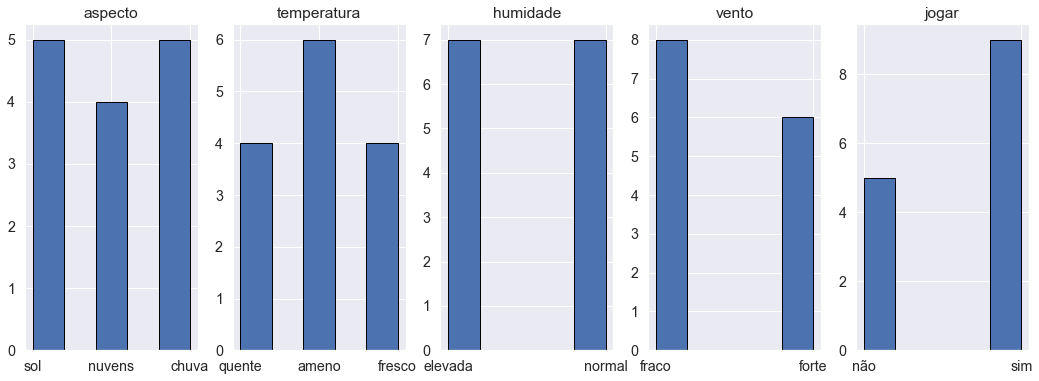

In [62]:
#Histograma
columns=dados.columns[:5]
plt.subplots(figsize=(18,15))
length=len(columns)

for i,j in zip(columns,range(length)):
    plt.subplot((length/2),5,j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    dados[i].hist(bins=5,edgecolor='black')
    plt.title(i)
plt.show()

**Dataset pequeno, com alguns desequilíbrios de dados entre as variáveis**

# Modelo:

## 1° - Construir tabela de Contingencia 

## 2° - Construir tabela de probabilidades para cada classe das variáveis preditoras


### Variável Target

In [63]:
#Tabela(Target)
Target = pd.DataFrame(dados.jogar.value_counts())
Target['Prob'] = Target.aggregate(np.sum,axis=1)/len(dados)
round(Target,2)

,jogar,Prob
sim,9,0.64
não,5,0.36


### Variáveis Preditoras

- aspecto

In [118]:
#Tabela de contingencia (aspecto)
aspecto = pd.crosstab(dados.jogar, dados.aspecto,margins=True).T
aspecto = aspecto.iloc[:,0:2]
aspecto['Prob'] = round(aspecto.sum(axis=1)/len(dados),2)

aspecto

jogar,não,sim,Prob
aspecto,,,
chuva,2,3,0.36
nuvens,0,4,0.29
sol,3,2,0.36
All,5,9,1.00


In [119]:
#Tabela de probabilidades da variável(aspecto)
aspecto1 = aspecto.iloc[:,0:2]
aspecto1 = round(aspecto1/aspecto1.iloc[3,:],2)
aspecto1 = aspecto1.iloc[0:3,:]
aspecto1

jogar,não,sim
aspecto,,
chuva,0.4,0.33
nuvens,0.0,0.44
sol,0.6,0.22


- temperatura

In [120]:
#Tabela de contingencia (Temperatura)
temperatura = pd.crosstab(dados.jogar, dados.temperatura,margins=True).T
temperatura = temperatura.iloc[:,0:2]
temperatura['Prob'] = round(temperatura.sum(axis=1)/len(dados),2)

temperatura

jogar,não,sim,Prob
temperatura,,,
ameno,2,4,0.43
fresco,1,3,0.29
quente,2,2,0.29
All,5,9,1.00


In [122]:
#Tabela de probabilidades da variável(Temperatura)
temperatura1 = temperatura.iloc[:,0:2]
temperatura1 = round(temperatura1/temperatura1.iloc[3,:],2)
temperatura1 = temperatura1.iloc[0:3,:]
temperatura1

jogar,não,sim
temperatura,,
ameno,0.4,0.44
fresco,0.2,0.33
quente,0.4,0.22


- humidade

In [130]:
#Tabela de contingencia (humidade)
humidade = pd.crosstab(dados.jogar, dados.humidade,margins=True).T
humidade = humidade.iloc[:,0:2]
humidade['Prob'] = round(humidade.sum(axis=1)/len(dados),2)

humidade

jogar,não,sim,Prob
humidade,,,
elevada,4,3,0.5
normal,1,6,0.5
All,5,9,1.0


In [134]:
#Tabela de probabilidades da variável(humidade)
humidade1 = humidade.iloc[:,0:2]
humidade1 = round(humidade1/humidade1.iloc[2,:],2)
humidade1 = humidade1.iloc[0:2,:]
humidade1

jogar,não,sim
humidade,,
elevada,0.8,0.33
normal,0.2,0.67


- vento

In [135]:
#Tabela de contingencia (vento)
vento = pd.crosstab(dados.jogar, dados.vento,margins=True).T
vento = vento.iloc[:,0:2]
vento['Prob'] = round(vento.sum(axis=1)/len(dados),2)

vento

jogar,não,sim,Prob
vento,,,
forte,3,3,0.43
fraco,2,6,0.57
All,5,9,1.00


In [136]:
#Tabela de probabilidades da variável(vento)
vento1 = vento.iloc[:,0:2]
vento1 = round(vento1/vento1.iloc[2,:],2)
vento1 = vento1.iloc[0:2,:]
vento1

jogar,não,sim
vento,,
forte,0.6,0.33
fraco,0.4,0.67


**Modelo Naive Bayes requer a construção da tabela de contingência e a tabela de probabilidades para as variáveis preditoras categóricas**

## Previsão:

## Modelo sem utilizar algoritimos

- **Variável X = aspecto, temperatura, humidade, vento**
- **Variável Y = jogar**


**Classes da variáveis X:**

- **aspecto** = sol, **temperatura** = fresco, **humidade**= normal, **vento** = fraco




- **Prob(Sol|sim)** = 2/9 = 0.22

- **Prob(Sol)** = 5/14 = 0.36

- **Prob(sim)** = 9/14 = 0.64 

- **Prob(sim|sol)** = 0.22 * 0.64 / 0.36 = 0.4


- **Prob(Sol|nao)** =  3/5 = 0.6

- **Prob(Sol)** = 5/14 = 0.36

- **Prob(nao)** = 5/14 = 0.36

- **Prob(nao|sol)** = 0.6 * 0.36 / 0.36 = 0.6



- **Prob(fresco|sim)** = 3/9 = 0.33 

- **Prob(fresco)** = 4/14 = 0.285

- **Prob(sim)** =  9/14 = 0.64 

- **Prob(sim|fresco)** = 0.33 * 0.64 / 0.285 = 0.74



- **Prob(fresco|nao)** = 1/5 = 0.2 

- **Prob(fresco)** = 4/14 = 0.285

- **Prob(nao)** =  5/14 = 0.36

- **Prob(nao|fresco)** = 0.2 * 0.36 / 0.285 = 0.26






- **Prob(normal|sim)** = 6/9 = 0.67 

- **Prob(normal)** = 7/14 = 0.5

- **Prob(sim)** =  9/14 = 0.64 

- **Prob(sim|normal)** = 0.67 * 0.64 / 0.5 = 0.86



- **Prob(normal|nao)** = 1/5 = 0.2

- **Prob(normal)** = 7/14 = 0.5

- **Prob(nao)** =  5/14 = 0.36

- **Prob(nao|normal)** = 0.2 * 0.36 / 0.5 = 0.14






- **Prob(fraco|sim)** = 6/9 = 0.67

- **Prob(fraco)** = 8/14 = 0.57

- **Prob(sim)** =  9/14 = 0.64 

- **Prob(sim|fraco)** = 0.67 * 0.64 / 0.57 = 0.75



- **Prob(fraco|nao)** = 2/5 = 0.4

- **Prob(fraco)** = 8/14 = 0.57

- **Prob(nao)** =  5/14 = 0.36

- **Prob(nao|fraco)** = 0.4 * 0.36 / 0.57 = 0.25





- **Soma das Probabilidades das classes sim** = 0.4 + 0.74 + 0.86 + 0.75 = 2.75

- **Soma das Probabilidades das classes nao** = 0.6 + 0.26 + 0.14 + 0.25 = 1.25

- **Soma total** = 2.75 + 1.25 = 4


- **Prob(sim|x)** = 2.75 / 4 = 0.69%


- **Prob(nao|x)** = 1.25 / 4 = 0.31%

In [147]:
#Calculo:
#Variáveis X = aspecto = sol, temperatura = fresco, humidade = normal, vento = fraco
#Variável Y = jogar


#Variável aspecto = sol
#Probabilidade de jogar = sim 

Prob_Sol_sim = 2/9

Prob_Sol = 5/14 

Prob_sim = 9/14 

Prob_sim_sol = Prob_Sol_sim * Prob_sim / Prob_Sol


#Variável aspecto = sol
#Probabilidade de jogar = não

Prob_Sol_nao = 3/5

Prob_Sol = 5/14 

Prob_nao = 5/14 

Prob_nao_sol = Prob_Sol_nao * Prob_nao / Prob_Sol


#Variável temperatura = fresco
#Probabilidade de jogar = sim 

Prob_fresco_sim = 3/9 

Prob_fresco= 4/14 

Prob_sim =  9/14 

Prob_sim_fresco = Prob_fresco_sim * Prob_sim / Prob_fresco


#Variável temperatura = fresco
#Probabilidade de jogar = não

Prob_fresco_nao = 1/5

Prob_fresco = 4/14

Prob_nao =  5/14

Prob_nao_fresco = Prob_fresco_nao * Prob_nao / Prob_fresco 




#Variável humidade = normal
#Probabilidade de jogar = sim 

Prob_normal_sim =6/9 

Prob_normal = 7/14

Prob_sim =  9/14

Prob_sim_normal = Prob_normal_sim * Prob_sim / Prob_normal


#Variável humidade = normal
#Probabilidade de jogar = não

Prob_normal_nao = 1/5

Prob_normal = 7/14 

Prob_nao =  5/14 

Prob_nao_normal = Prob_normal_nao * Prob_nao / Prob_normal





#Variável vento = normal
#Probabilidade de jogar = sim 

Prob_fraco_sim = 6/9 

Prob_fraco = 8/14

Prob_sim =  9/14 

Prob_sim_fraco = Prob_fraco_sim * Prob_sim / Prob_fraco 


#Variável vento = normal
#Probabilidade de jogar = não

Prob_fraco_nao = 2/5

Prob_fraco = 8/14 

Prob_nao =  5/14 

Prob_nao_fraco = Prob_fraco_nao * Prob_nao / Prob_fraco



#Somar todas as probabilidades da classe jogar = sim 
Som_prob_class_sim  = Prob_sim_sol + Prob_sim_fresco + Prob_sim_normal + Prob_sim_fraco

#Somar todas as probabilidades da classe jogar = não
Som_prob_class_nao = Prob_nao_sol + Prob_nao_fresco + Prob_nao_normal + Prob_nao_fraco

#Somar todas as probabilidades
Soma_total = Som_prob_class_sim + Som_prob_class_nao

#Probabilidade de jogar = sim dado as variáveis X
Prob_sim_x = Som_prob_class_sim / Soma_total 

#Probabilidade de jogar = não dado as variáveis X
Prob_nao_x = Som_prob_class_nao / Soma_total 


print(f'Probabilidade de ser sim dado as variáveis X: {round(Prob_sim_x*100,2)}%')
print(f'Probabilidade de ser não dado as variáveis X: {round(Prob_nao_x*100,2)}%')

Probabilidade de ser sim dado as variáveis X: 68.93%
Probabilidade de ser não dado as variáveis X: 31.07%


**Construção do algoritimo Naive Bayes sem o uso do algoritimo**

# Modelo utilizando algoritimo

## Transformar as variáveis categóricas em dummies

In [12]:
#Dummy
dm1=  pd.get_dummies(dados['aspecto'])
dm2 = pd.get_dummies(dados['temperatura'])
dm3 = pd.get_dummies(dados['humidade'])
dm4 = pd.get_dummies(dados['vento'])

#Juntar as variáveis em um novo dataframe
dd1 = dm1.join(dm2)
dd2 = dd1.join(dm3)
dd3 = dd2.join(dm4)
dadosf = dd3.join(dados.iloc[:,4])

#Separar as variáveis em treino e teste
x = dadosf.iloc[:,0:10]
y = dadosf.iloc[:,10]
dadosf

,chuva,nuvens,sol,ameno,fresco,quente,elevada,normal,forte,fraco,jogar
0,0,0,1,0,0,1,1,0,0,1,não
1,0,0,1,0,0,1,1,0,1,0,não
2,0,1,0,0,0,1,1,0,0,1,sim
3,1,0,0,1,0,0,1,0,0,1,sim
4,1,0,0,0,1,0,0,1,0,1,sim
5,1,0,0,0,1,0,0,1,1,0,não
6,0,1,0,0,1,0,0,1,0,1,sim
7,0,0,1,1,0,0,1,0,0,1,não
8,0,0,1,0,1,0,0,1,0,1,sim
9,1,0,0,1,0,0,0,1,1,0,sim


**Os modelos de machine learning requer que as variáveis preditoras categóricas sejam transformadas em numéricas(dummies) para construção do modelo**

## Modelo GaussianNB

In [13]:
from sklearn.naive_bayes import GaussianNB
mod1 = GaussianNB()
mod1.fit(x,y)

#Previsao
GaussianNB = pd.DataFrame(mod1.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
GaussianNB['y_chapeu']=np.argmax(GaussianNB.to_numpy(),axis=1)
GaussianNB['Target'] = dados.iloc[:,4]
GaussianNB

,0,1,y_chapeu,Target
0,0.999999,1.362928e-06,0,não
1,1.000000,1.321660e-07,0,não
2,0.000000,1.000000e+00,1,sim
3,0.999971,2.943623e-05,0,sim
4,0.985935,1.406472e-02,0,sim
5,0.998619,1.381429e-03,0,não
6,0.000000,1.000000e+00,1,sim
7,0.999995,5.429104e-06,0,não
8,0.997376,2.624079e-03,0,sim
9,0.999456,5.436897e-04,0,sim


<AxesSubplot:>

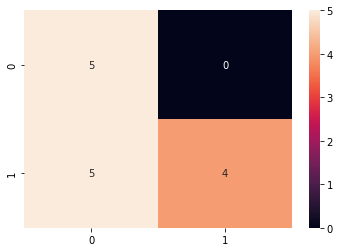

In [14]:
#Matriz de Confusao
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(pd.get_dummies(dados['jogar'],drop_first=True),GaussianNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [15]:
#Acuracia
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(pd.get_dummies(dados['jogar'],drop_first=True),GaussianNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 64.3%


**Os modelos Gaussianos Naive Bayes esperam que os dados sejam contínuos função densidade probabilidade e com distribuição normal, por isso não obteve um bom resultado**

## Modelo BernoulliNB

In [16]:
from sklearn.naive_bayes import BernoulliNB
mod2 = BernoulliNB()
mod2.fit(x,y)


#Previsao
BernoulliNB = pd.DataFrame(mod2.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
BernoulliNB['y_chapeu']=np.argmax(BernoulliNB.to_numpy(),axis=1)
BernoulliNB['Target'] = dados.iloc[:,4]
BernoulliNB

,0,1,y_chapeu,Target
0,0.841560,0.158440,0,não
1,0.966576,0.033424,0,não
2,0.230044,0.769956,1,sim
3,0.468741,0.531259,1,sim
4,0.034612,0.965388,1,sim
5,0.163320,0.836680,1,não
6,0.005434,0.994566,1,sim
7,0.705032,0.294968,0,não
8,0.088527,0.911473,1,sim
9,0.200621,0.799379,1,sim


<AxesSubplot:>

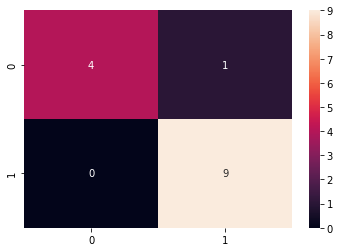

In [17]:
#Matriz de Confusao
cm = confusion_matrix(pd.get_dummies(dados['jogar'],drop_first=True),BernoulliNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [18]:
#Acuracia
acuracia = accuracy_score(pd.get_dummies(dados['jogar'],drop_first=True),BernoulliNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 92.9%


**Modelo Bernulli espera que os dados sejam discretos e a variavel target binaria, Algoritimo cometeu apenas 1 erro** 

## Modelo MultinomialNB

In [19]:
from sklearn.naive_bayes import MultinomialNB
mod3 = MultinomialNB()
mod3.fit(x,y)

#Previsao
MultinomialNB = pd.DataFrame(mod3.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
MultinomialNB['y_chapeu']=np.argmax(MultinomialNB.to_numpy(),axis=1)
MultinomialNB['Target'] = dados.iloc[:,4]
MultinomialNB

,0,1,y_chapeu,Target
0,0.686868,0.313132,0,não
1,0.836555,0.163445,0,não
2,0.247572,0.752428,1,sim
3,0.425393,0.574607,1,sim
4,0.123586,0.876414,1,sim
5,0.247572,0.752428,1,não
6,0.036241,0.963759,1,sim
7,0.568244,0.431756,0,não
8,0.200442,0.799558,1,sim
9,0.283071,0.716929,1,sim


<AxesSubplot:>

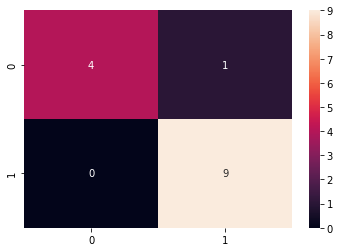

In [20]:
#Matriz de Confusao
cm = confusion_matrix(pd.get_dummies(dados['jogar'],drop_first=True),MultinomialNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [21]:
#Acuracia
acuracia = accuracy_score(pd.get_dummies(dados['jogar'],drop_first=True),MultinomialNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 92.9%


**Modelo Multinomial espera que as variáveis preditoras sejam discretas e a variavel target multinomial, Algoritimo cometeu apenas 1 erro**

## Base de Dados  com classificação multiclasse e variável preditora continua

In [22]:
#Dataset Iris
import sklearn.datasets  as dataset

#Carregar base de dados
ds = dataset.load_iris()
x = pd.DataFrame(ds.data,columns=ds.feature_names)
y = pd.DataFrame(ds.target,columns=['Target'])
dados =x.join(y)
dados

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Observe que além da variavel target ser multiclasse as variáveis preditoras agora são continuas**

# Distribuição dos dados 

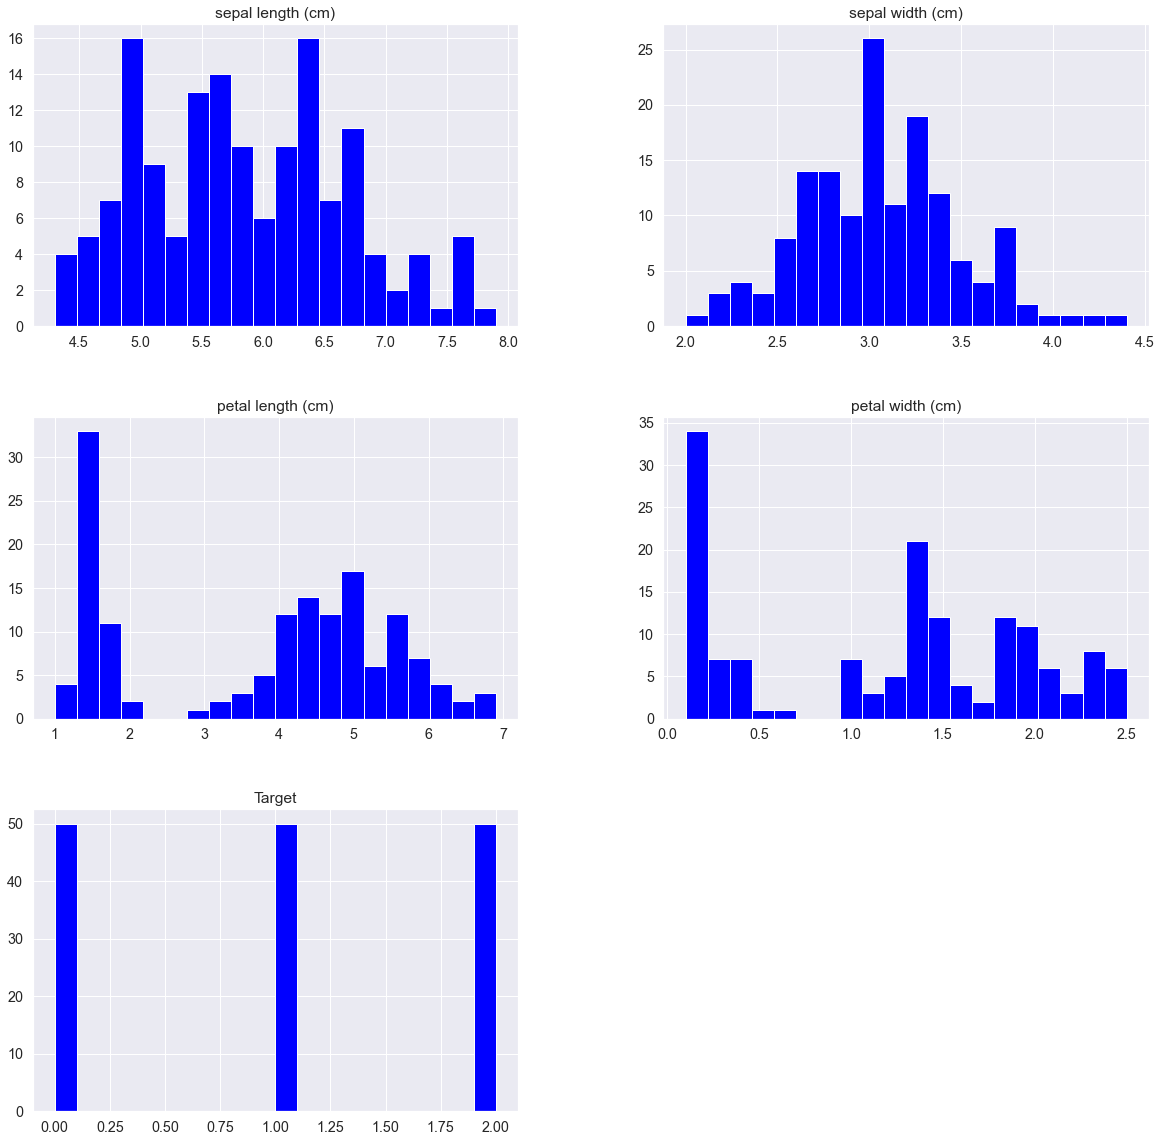

In [23]:
import seaborn as sns

sns.set(font_scale=1.3,rc={'figure.figsize':(20,20)})
eixo=dados.hist(bins=20,color='blue')

**Nota-se que algumas variáveis preditoras seguem uma distribuição normal e a variavel target está com equilíbrio nas classes**

# Modelo

## GaussianNB

- **O modelo Gaussianos Naive Bayes espera que os dados sejam contínuos (função densidade probabilidade) e com distribuição normal**

In [24]:
from sklearn.naive_bayes import GaussianNB
mod1 = GaussianNB()
mod1.fit(x,y)

#Previsao
GaussianNB = pd.DataFrame(mod1.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
GaussianNB['y_chapeu']=np.argmax(GaussianNB.to_numpy(),axis=1)
GaussianNB['Target'] = dados.iloc[:,4]
GaussianNB

,0,1,2,y_chapeu,Target
0,1.000000e+00,1.357843e-18,7.112835e-26,0,0
1,1.000000e+00,1.514808e-17,2.348201e-25,0,0
2,1.000000e+00,1.073042e-18,2.340268e-26,0,0
3,1.000000e+00,1.466195e-17,2.954927e-25,0,0
4,1.000000e+00,4.532919e-19,2.883900e-26,0,0
...,...,...,...,...,...
145,1.565566e-191,5.855080e-07,9.999994e-01,2,2
146,1.060620e-149,2.544576e-02,9.745542e-01,2,2
147,7.988593e-168,3.701669e-04,9.996298e-01,2,2
148,1.443786e-199,2.460204e-07,9.999998e-01,2,2


<AxesSubplot:>

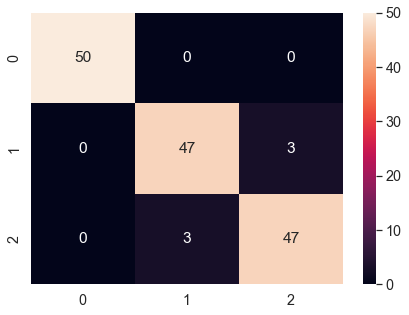

In [25]:
#Matriz de Confusao
fig, ax = plt.subplots(figsize=(7, 5))
cm = confusion_matrix(y,GaussianNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [26]:
#Acuracia
acuracia = accuracy_score(y,GaussianNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 96.0%


**Como os requisitos do algoritimo estão de acordo com os dados, o algoritimo teve uma boa performance**

## BernoulliNB

- **O Modelo Bernulli espera que os dados sejam discretos e a variavel target binaria** 

In [27]:
from sklearn.naive_bayes import BernoulliNB
mod2 = BernoulliNB()
mod2.fit(x,y)


#Previsao
BernoulliNB = pd.DataFrame(mod2.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
BernoulliNB['y_chapeu']=np.argmax(BernoulliNB.to_numpy(),axis=1)
BernoulliNB['Target'] = dados.iloc[:,4]
BernoulliNB

,0,1,2,y_chapeu,Target
0,0.333333,0.333333,0.333333,0,0
1,0.333333,0.333333,0.333333,0,0
2,0.333333,0.333333,0.333333,0,0
3,0.333333,0.333333,0.333333,0,0
4,0.333333,0.333333,0.333333,0,0
...,...,...,...,...,...
145,0.333333,0.333333,0.333333,0,2
146,0.333333,0.333333,0.333333,0,2
147,0.333333,0.333333,0.333333,0,2
148,0.333333,0.333333,0.333333,0,2


<AxesSubplot:>

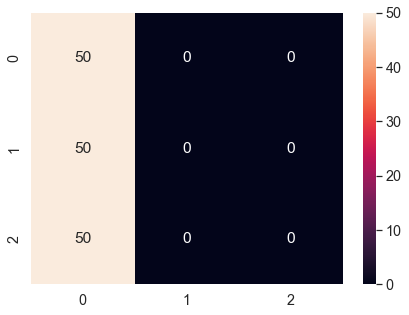

In [28]:
#Matriz de Confusao
fig, ax = plt.subplots(figsize=(7, 5))
cm = confusion_matrix(y,BernoulliNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [29]:
#Acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y,BernoulliNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 33.3%


**Algoritimo não teve uma boa predição, pois os dados são contínuos e a variável target multivariada**

## MultinomialNB

- **O Modelo Multinomial espera que as variáveis preditoras sejam discretas e a variavel target multinomial**

In [30]:
from sklearn.naive_bayes import MultinomialNB
mod3 = MultinomialNB()
mod3.fit(x,y)

#Previsao
MultinomialNB = pd.DataFrame(mod3.predict_proba(x))

#Adicionar as variáveis: y_chapeu e Target
MultinomialNB['y_chapeu']=np.argmax(MultinomialNB.to_numpy(),axis=1)
MultinomialNB['Target'] = dados.iloc[:,4]
MultinomialNB

,0,1,2,y_chapeu,Target
0,0.751995,0.160929,0.087075,0,0
1,0.684283,0.199746,0.115971,0,0
2,0.716524,0.180332,0.103145,0,0
3,0.667739,0.208637,0.123624,0,0
4,0.759256,0.156401,0.084343,0,0
...,...,...,...,...,...
145,0.009494,0.462361,0.528144,2,2
146,0.013097,0.467050,0.519853,2,2
147,0.013816,0.474113,0.512071,2,2
148,0.009361,0.459720,0.530919,2,2


In [ ]:
#Matriz de Confusao
fig, ax = plt.subplots(figsize=(7, 5))
cm = confusion_matrix(y,MultinomialNB['y_chapeu'])
sns.heatmap(cm,annot=True,fmt='d')

In [32]:
#Acuracia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y,MultinomialNB['y_chapeu'])
print(f'Acuracia: {acuracia*100:.1f}%')

Acuracia: 95.3%


**Algoritimo performance bem com a variável target sendo policotômica**

# Conclusão:

**Cada modelo Naive Bayes requer um tipo de dados para conseguir ter o melhor resultado, nesses exemplos colocamos 2 dataset totalmente diferente, o 1° com variáveis preditoras categóricas e a variavel target binaria, os melhores modelos para esses tipos de dados foram os modelos Bernulli e Multinomial, já no 2° Dataset as variáveis preditoras eram continuas e a variavel target multiclasse, e os modelos que apresentaram os melhores resultados foram os modelos Gaussiano e MultinomialNB, portanto a analise descritiva é primordial para que se conheça os dados e aplique o melhor algoritimo para chegar no melhor resultado**